<a href="https://colab.research.google.com/github/Nisargbharambe/Machine-Learning/blob/master/Blue_Book_Bulldozers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "fastai==0.7.0"
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch
!pip install Pillow>=4.1.1
!pip install image
%matplotlib inline
from fastai.imports import *
!pip install "torchtext==0.2.3"

     |████████████████████████████████| 122kB 3.5MB/s 
     |████████████████████████████████| 496.4MB 32kB/s 
     |████████████████████████████████| 1.5MB 40.8MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2653740 sha256=73f8b9814d6006ec57935c7908eb6ecf827403e2acbda166c3177a9f86602ccf
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
ERROR: torchvision 0.3.0 has requirement torch>=1.1.0, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.1.0
    Uninstalling torch-1.1.0:
      Successfully uninstalled torch-1.1.0
  Found existing installation: fastai 1.0.57
    Uninstalling fastai-1.0.57:
      Successfully uninstalled fastai-1.0.57
     |████████████████████████████████| 28.7MB 1.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |███████████████

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nisarg1","key":"db73931bfef861566a0aa4161023d62a"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          19837  
lakshyaag/india-trade-data                                India - Trade Data                                   1MB  2019-08-16 16:13:58           9982  
dareenalharthi/jamalon-arabic-books-dataset               Jamalon Arabic Books Dataset                         1MB  2019-08-15 18:58:06            535  
rajeevw/ufcdata                                           UFC-Fight historical data from 1993 to 2019          2MB  2019-07-05 09:58:02            241  
therohk/ireland-historical-news                           The Irish Times - Waxy-W

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c bluebook-for-bulldozers

 73% 5.00M/6.85M [00:01<00:00, 4.61MB/s]
100% 6.85M/6.85M [00:01<00:00, 6.15MB/s]
 54% 5.00M/9.28M [00:00<00:00, 50.8MB/s]
100% 9.28M/9.28M [00:00<00:00, 59.2MB/s]
  0% 0.00/209k [00:00<?, ?B/s]
100% 209k/209k [00:00<00:00, 67.3MB/s]
  0% 0.00/3.17M [00:00<?, ?B/s]
100% 3.17M/3.17M [00:00<00:00, 214MB/s]
  0% 0.00/297k [00:00<?, ?B/s]
100% 297k/297k [00:00<00:00, 94.1MB/s]
  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 11.2MB/s]
  0% 0.00/192k [00:00<?, ?B/s]
100% 192k/192k [00:00<00:00, 195MB/s]
 67% 33.0M/49.1M [00:06<00:02, 7.60MB/s]
100% 49.1M/49.1M [00:06<00:00, 7.94MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 99.3MB/s]
  0% 0.00/7.06M [00:00<?, ?B/s]
100% 7.06M/7.06M [00:00<00:00, 64.9MB/s]
 98% 112M/114M [00:00<00:00, 102MB/s] 
100% 114M/114M [00:00<00:00, 131MB/s]
 52% 5.00M/9.59M [00:00<00:00, 35.4MB/s]
100% 9.59M/9.59M [00:00<00:00, 38.0MB/s]
  0% 0.00/3.40M [00:00<?, ?B/s]
100% 3.40M/3.40M [00:00<00:00, 229MB/s]
  0% 0.00/207k [00:00<?, ?

In [9]:
!unzip \*.zip

Archive:  TrainAndValid.zip
replace TrainAndValid.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: TrainAndValid.csv       

Archive:  Train.zip
  inflating: Train.csv               

Archive:  Valid.zip
  inflating: Valid.csv               

3 archives were successfully processed.


In [0]:
import pandas as pd
df_raw = pd.read_csv('Train.csv',low_memory=False, parse_dates=['saledate'])   

#This tells pandas that the saledate column is of dtype=Date

In [0]:
# Pretty useless code...
# Can use >> df_raw.tail().T directly.

# This function is used to display all the rows and columns upto 1000 X 1000

def display_all(df):
  with pd.option_context('display.max_rows',1000):
    with pd.option_context('display.max_columns',1000):
      display(df)  

In [12]:
#pd.reset_option('^display.', silent=True)

display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [0]:
# We have been told that evaluation is based on root mean square log error.
# i.e the percentage change matters and not the difference.

df_raw.SalePrice = np.log(df_raw.SalePrice)

# **Initial Processing/Fitting**

***Random Forest Regressor.***

This model generally doesnt overfit very badly and we are just testing it out.
In general,
1. Doesnt overfit data badly
2. Doesnt assume that data follows Normal (Gaussian) Distribution.
3. It doesnt require cross-validation set as such.
4. It is easy to tweak the paramters from overfitting.

## Curse of Dimensionality:
The more is the number of dimensions (i.e. columns) , more it is difficult to process.
It says that the points in a space (any dimension) are likely to be more concerntrated at the edges(dimensions) rather than being anywhere else , kind of like deciding the boundary.
    It means that the distance b/w 2 points is much less meaningful.
    In short, it meant that, as the dimensions of the data increases , the quality of results decrease.
   
 Argument against CoD:  
    That, is not a case in today's world. Curse of Dimensionality was glorified by theorotical scientists in the 90's.
    We can work with the data which has higher number of columns and still produce great results.
     

## No Free Lunch Theorem: 
It says that there is no model which will work any kind of dataset(At random).
At present, Random Forest Ensemble methods tend to work good for most of the datasets.

In [0]:
%load_ext autoreload
%autoreload 2
# Used to load the source code of libraries.

%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [16]:
m = RandomForestClassifier(n_jobs=-1)
m.fit(df_raw.drop('SalePrice',axis=1), df_raw.SalePrice)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [17]:
# This didnt work since we have string(character) based data which cant be converted directly into numerical values.
# Machine Learning models use numerical data only. So, we need to convert categorical data into numerical data.
add_datepart

# This is an specifically added functionality by fast.ai
# View the source code via ??add_datepart

add_datepart(df_raw,'saledate')
df_raw.saleYear.head()

# We are going to change the Date and Categoryies.
# Categories here follows an order

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [18]:
train_cats( df_raw )
df_raw.UsageBand.cat.categories

# Another added functionality by fast.ai,
# This is an ordinal categorical variable type.
# Here it assigns , High->0, Low->1, Medium->2 .(This isnt in order,
# but works well in this case.)

# This train_cats() adds more features just related to date , to df_raw. To check use, df_raw.columns
# This is against Curse of Dimensionality, and still works fine...

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
# So, we can change the order by doing,
df_raw.UsageBand.cat.set_categories(['High','Medium','Low'], 
                                    ordered=True, inplace=True)

In [20]:
# Now, we will check for missing values.
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [0]:
# So, we see that there are many missing values.

# Before that, since training the data and other things took a considerable amount of time
# , we will save the file.

# The technique shown below is the feather technique(esoteric) and it saves the file in the same 
# current format, as it was in RAM, and can be reloaded.
# Fastest Way of Saving & Retrieving the file.

os.makedirs( 'tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

# The dataset can be loaded in future via
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [0]:
import pandas as pd
df_raw = pd.read_feather('tmp/bulldozers-raw')

In [23]:
# Now, handling missing values, categories to numeric and splitting features and the target variable
df , y , nas= proc_df(df_raw, 'SalePrice')
# To, see how proc_df works , use ??proc_df to see the source code.('nas' isnt required but gives unpacking error if not used. proc_df returns 3, we require 
# only 1st 2...)
# Now,
df.head()
# So, there is not missing values, Categorical data(Booleans are allowed)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,41,0,0,0,59,1,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,55,98,0,4,62,33,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,12,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,0,0,0,0,39,32,3,3,0,6,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,0,45,0,6,8,44,4,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,0,0,0,0,40,32,3,3,0,1,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200,False,False


In [24]:
# df -> Training examples with features
# y -> Target Variable
m = RandomForestRegressor(n_jobs=-1)
m.fit(df,y)
m.score(df,y)
# 0.98 is really good. i.e. almost all correct predictions.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830107511817218

In [25]:
# This might be due to Overfitting.
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df,y,test_size=0.03)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((389091, 66), (389091,), (12034, 66), (12034,))

In [26]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(m.predict(X_val),y_val))

0.008361670783830787

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_val), y_val),
                m.score(X_train, y_train), m.score(X_val, y_val)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# print_score() prints [RMSE(train) , RMSE(val) , R2(train) , R2(val)]   

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2min 6s, sys: 97 ms, total: 2min 6s
Wall time: 1min 4s
[0.0906432967183495, 0.21673954390279943, 0.9829151292054904, 0.9036744352212485]


**0.21 is a pretty good score and lands a spot in top 20% of the Kaggle competition.**

*Now , time to dive deep in Random Forests...*

This training actually takes a lot of time. So, we speed up things 

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

In [30]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 3.96 s, sys: 13.8 ms, total: 3.98 s
Wall time: 2.07 s
[0.11309244422924766, 0.30689032839009595, 0.9719999201769753, 0.8068780412465492]


R2 here is 0.81 (near 1). So, its good enough.

In [31]:
# Now, we will use a single tree
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)

# n_estimators = no. of trees
# max_depth (decides the depth of the tree)
# bootstrap (Decides randomising or not). Since, we are prototyping,
# we can turn off randoming using bootstrap=False
# n_jobs = no. of cpu's to be distributed upon.(n_jobs=-1,use all resoures)

m.fit(X_train, y_train)
print_score(m)

[0.5268520667251745, 0.5449572019848744, 0.3923276655482699, 0.39103820503227016]


R2 here has come down from 0.81 to 0.39(for Cross-Val). So, this doesnt seem like a good model. 
Let's see why this is happening

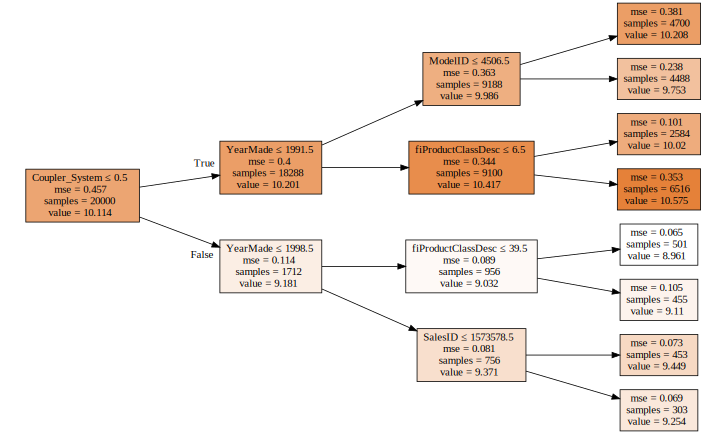

In [32]:
draw_tree(m.estimators_[0], df_trn ,precision =3)

This shows that putting a constraint over the depth(max_depth) of the tree, prevents Overfitting. At each level we consider every feature on every set and we compare it with the error rate. That's how the deciding feature is chosen.
Eg:Here, coupler_system is the most important feature. Coupler_system was tested on every subset and its error was recorded. Likewise, all other features were tested on every subset and their features were recorded. Copuler_System happened to be the one with the least error rate. So, coupler _system value for an example is tested against the mean value(Coupler_System); based on this transitions are made. 
Same procedure is used to for rest all of the levels.
If there is no limit on the depth of the tree, R squared will be 1, since the tree will result into leaf nodes having the examples from the training set. This results in extreme overfitting.  

In [33]:
# Creating a bigger tree
m = RandomForestRegressor(n_estimators=1,bootstrap=False,n_jobs=-1)
m.fit(X_train , y_train)
print_score(m)

# So, we can see that R2(train)=1(Perfectly overfitting)
# R2(validation) = 0.66 (0.73 in Course video)

[5.329070518200751e-17, 0.3960967031277853, 1.0, 0.6782876677958999]


 **We now try to create a Forest out of all this. Imagine running multiple trees on the data each of which are massively overfitting. Each of the trees will give their best feature with minimum error rate(like coupling_system from 1 tree). Subsequently, rest all of the trees give the their best feature.
 But this is only possible if the errors are non correlated. Otherwise, no matter how many trees are there, these trees will give redundant features.**

 One way to achieve this is using **Bagging**.

In [34]:
m = RandomForestRegressor(n_jobs=-1)     # n_estimators = 10
m.fit(X_train,y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11270888364248885, 0.3035399206545016, 0.9721895263857382, 0.8110717567284821]


In [35]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0])  , y_valid[0]

(array([9.61581, 8.9872 , 9.10498, 9.43348, 9.07681, 9.21034, 9.95228, 9.54681, 9.9988 , 8.96188]),
 9.388838250200399,
 9.104979856318357)

This shows that for 1st element of validation set, the prediction was 9.388(mean from the forest) whereas the original value was 9.104. See that, it improved a little from 9.615(individual tree) to 9.388 

In [36]:
preds.shape

# For 10 trees , 12000 predictions

(10, 12000)

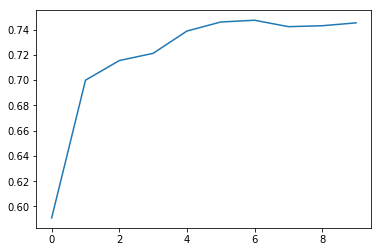

In [37]:
#This plot shows r2 v/s no. of trees...
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1],axis=0)) for i in range (10)])

As the number of trees increases, the R2 value comes closer & closer to 1. Although, after some point, saturation is observed .

Eg:R2 values for
1.) n_estimators = 20 -> 0.862
2.) n_estimators = 40 -> 0.867
3.) n_estimators = 80 -> 0.869

So, after certain number of trees, there is not much point in adding more trees.


### **Out-of-bag (OOB) score**

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our print_score function below.

In [41]:
m = RandomForestRegressor(n_estimators=40 , n_jobs=-1 , oob_score=True)
m.fit(X_train , y_train)
print_score(m)

# R2 val=0.88 (Validation Set)
# R2 val=0.88 (oob_Set)
# So , we can say that OOB_Validation set is a good alternative to
# Validation set , if their isnt that much data to have an CV set.

[0.2276762433181214, 0.23303225638865008, 0.8916646327542921, 0.888648176226558, 0.8800841180762558]


### **Subsampling - Faster way to tackle Overfitting & Cross Validation data issue**
The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [0]:
df_trn, y_trn , _ = proc_df(df_raw , 'SalePrice')
X_train , X_valid = split_vals(df_trn , n_trn)
y_train , y_valid = split_vals(y_trn , n_trn)

In [40]:
set_rf_samples(20000)
# To turn off , use  reset_rf_samples()   
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train , y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 10.4 s, sys: 136 ms, total: 10.5 s
Wall time: 6.71 s
[0.2415145996832884, 0.24694758371943532, 0.8780949759453277, 0.8749525568657768, 0.8653509273016672]


Now lets, increase the n_estimators from 10 to 40 , as additional trees can be more useful

In [43]:
m = RandomForestRegressor(n_estimators=40,n_jobs=-1, oob_score=True)
m.fit(X_train,y_train)
print_score(m)

# R2 of validation set went up from 0.87 to 0.89(approx)

[0.22764871429319838, 0.2330713437157617, 0.891690829485914, 0.8886108182208184, 0.880148165657431]


## Tree building parameters
Going back to normal (full bootstrap) samples or set for further analysis

In [0]:
reset_rf_samples()

In [46]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train , y_train)
print_score(m)

[0.07851002666524973, 0.08981557518673365, 0.9871179471721772, 0.9834587408853279, 0.9083672597202173]


Another way of handling Overfitting is by limiting the depth of the tree since, there will be less no. of decisions to be made. This will make generalization better.

In [47]:
m = RandomForestRegressor(n_estimators=40,min_samples_leaf=3,
                          n_jobs=-1, oob_score=True)
m.fit(X_train , y_train)
print_score(m)

# R2 for training came down from 0.9834 to 0.96(to prevent overfitting)

[0.11505359017617685, 0.12261929650041443, 0.9723347132323685, 0.9691693348742184, 0.9083598746816282]


Imagine that we have a feature which is much more good at predictions than rest of them. So, for each tree , the root node condition is based on it ; the trees tend to be similar and correlated. This wont give desired results.
So,
we can choose our a number of rows for each tree , now with **a number of specific features, or columns(which may be identical to those of the previous trees or not**).
This can be achieved by using max_features

In [48]:
 m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3 
                           ,max_features=0.5, n_jobs=-1, oob_score=True)
 m.fit(X_train , y_train)
 print_score(m)

[0.11914101029338195, 0.1260460143127116, 0.970334109926826, 0.9674220697811589, 0.911722232567324]


**This 0.12 lands us a top spot in the Blue Book Kaggle Competition.(Top 10)** 